In [11]:
from src.preprocessing import load_sentences, tokenize, clean_and_filter
from src.vocab import build_vocab, assign_classes
from src.model import SmallLanguageModel
from src.train import train
from src.generator import generate_sentence
from src.visualizer import (
    plot_top_words, plot_class_distribution,
    plot_loss, plot_embeddings, plot_component_losses
)
import torch
import random
from collections import Counter

In [2]:
raw = load_sentences('data/deu_news_2024_10K-sentences.txt')
print(f"Roh-Sätze: {len(raw)}")

Roh-Sätze: 10000


In [3]:
cleaned, filtered = clean_and_filter(raw, set()) 
vocab, w2i, i2w = build_vocab(cleaned, 8000)
w2c, classes, c2i, i2c = assign_classes(vocab)
cleaned, filtered = clean_and_filter(raw, set(vocab))
print(f"Gefilterte Sätze: {len(filtered)}")

Gefilterte Sätze: 1202


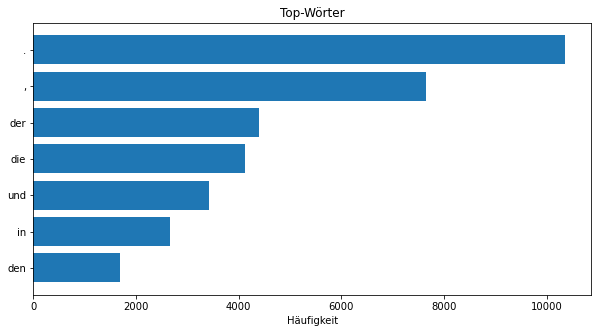

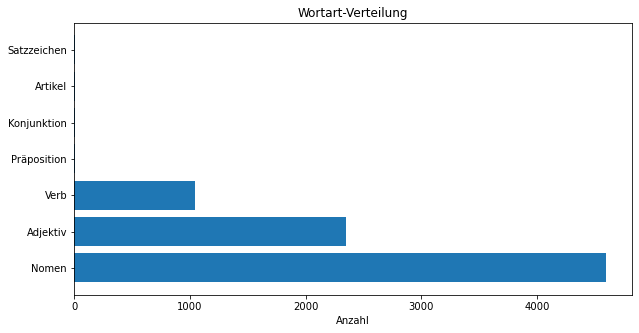

In [4]:
wc = Counter([tok for s in cleaned for tok in tokenize(s)])
top7 = wc.most_common(7)
words, counts = zip(*top7)
plot_top_words(words, counts)

class_counts = Counter(w2c.values())
plot_class_distribution(class_counts)

In [5]:
model = SmallLanguageModel(len(vocab), len(classes), 25, 100)
history = train(model, filtered, w2i, c2i)

Epoche 1/30 abgeschlossen: Loss=3.6757
Epoche 2/30 abgeschlossen: Loss=3.6051
Epoche 3/30 abgeschlossen: Loss=3.4998
Epoche 4/30 abgeschlossen: Loss=3.4308
Epoche 5/30 abgeschlossen: Loss=3.3715
Epoche 6/30 abgeschlossen: Loss=3.3959
Epoche 7/30 abgeschlossen: Loss=3.3266
Epoche 8/30 abgeschlossen: Loss=3.3079
Epoche 9/30 abgeschlossen: Loss=3.3674
Epoche 10/30 abgeschlossen: Loss=3.3598
Epoche 11/30 abgeschlossen: Loss=3.3343
Epoche 12/30 abgeschlossen: Loss=3.3388
Epoche 13/30 abgeschlossen: Loss=3.2501
Epoche 14/30 abgeschlossen: Loss=3.2579
Epoche 15/30 abgeschlossen: Loss=3.2791
Epoche 16/30 abgeschlossen: Loss=3.1695
Epoche 17/30 abgeschlossen: Loss=3.1822
Epoche 18/30 abgeschlossen: Loss=3.1963
Epoche 19/30 abgeschlossen: Loss=3.0938
Epoche 20/30 abgeschlossen: Loss=3.0975
Epoche 21/30 abgeschlossen: Loss=3.1300
Epoche 22/30 abgeschlossen: Loss=3.0150
Epoche 23/30 abgeschlossen: Loss=3.0971
Epoche 24/30 abgeschlossen: Loss=3.0433
Epoche 25/30 abgeschlossen: Loss=3.1038
Epoche 26

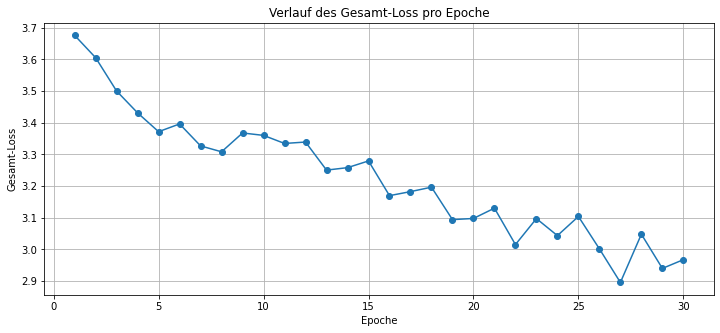

In [6]:
plot_loss(history)

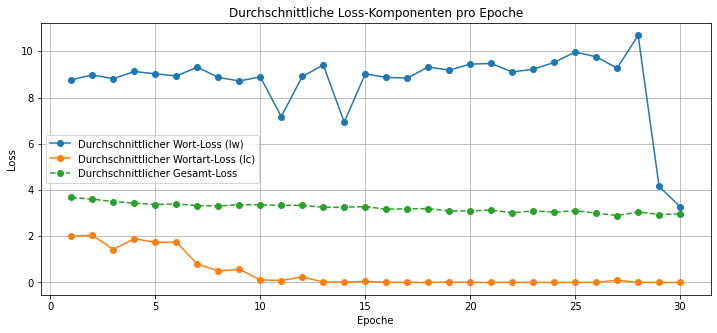

In [12]:
plot_component_losses(history)

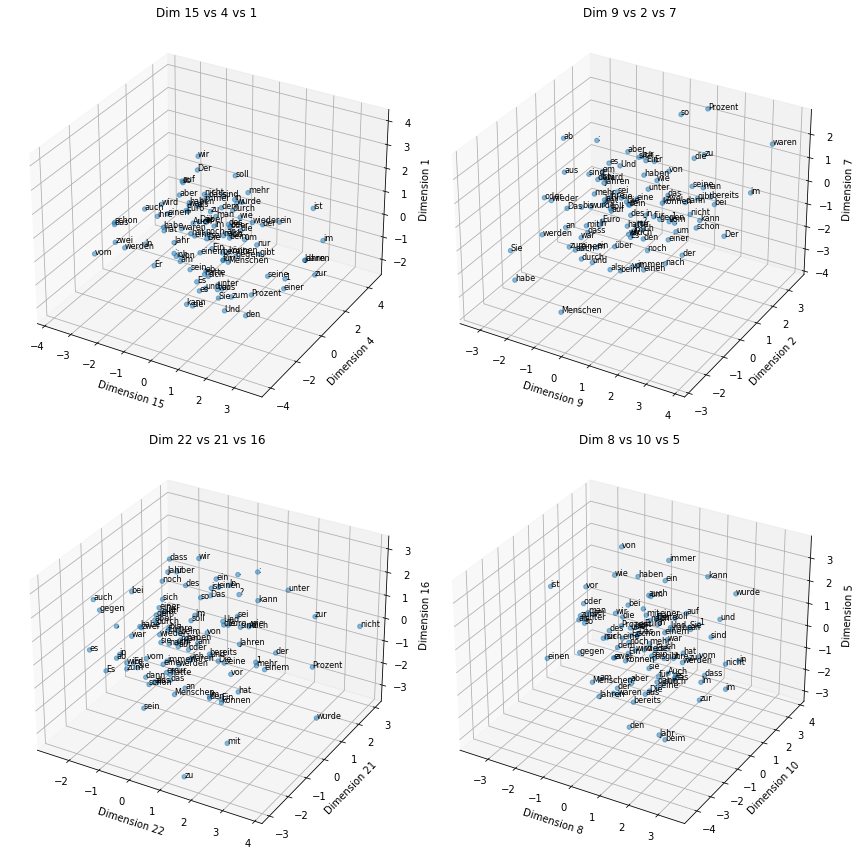

In [13]:
emb = model.embedding.weight.detach().cpu().numpy()[:100]
plot_embeddings(emb, vocab[:100])

In [149]:
print(generate_sentence(model, "Die Wirtschaft ist dieses Jahr", w2i, i2w, w2c, i2c))


Generierter Satz: Die Wirtschaft ist dieses Jahr sicher.


In [156]:
print(generate_sentence(model, "Die Bahn kommt", w2i, i2w, w2c, i2c))

Die Bahn kommt also?
